# Read lengths and positions

In [1]:
import pysam
import matplotlib.pyplot as plt
import numpy as np

## SAM file parsing

In [2]:
# sam_file = "../results/2022-09-21_amoxicillin_run_vial_14_time_14/reads.sam"
sam_file = "../results/2022-09-21_amoxicillin_run_vial_14_time_14/reads.sorted.bam"

# open sam/bam file
with pysam.AlignmentFile(sam_file) as af:

    print("description = ", af.description)
    print("n. references = ", af.nreferences)
    print("references = ", af.references)
    print("lengths = ", af.lengths)
    print("------")
    
    i = 1 #iter no
    for read in af:
            
        print("----------------------")
        
        # print("cigar string = ", read.cigarstring)
        # see https://pysam.readthedocs.io/en/latest/api.html#pysam.AlignedSegment.get_cigar_stats
        print("cigar stats = ", read.get_cigar_stats())
        print("------")
        

        print("in unmmapped = ", read.is_unmapped)
        print("is forward = ", read.is_forward)
        print("is secondary = ", read.is_secondary)
        print("is supplementary = ", read.is_supplementary)
        print("------")
        

        print("reference name = ", read.reference_name)
        print("reference start = ", read.reference_start)
        print("reference end = ", read.reference_end)
        print("reference length = ", read.reference_length)
        print("------")
        

        print("query name = ", read.query_name)
        print("query alignment start = ", read.query_alignment_start)
        print("query alignment end = ", read.query_alignment_end)
        print("query alignment length = ", read.query_alignment_length)
        print("query lenght = ", read.query_length)
        
        i -= 1
        if i == 0:
            break

description =  BAM version 1 compressed sequence data
n. references =  1
references =  ('barcode01/cluster_001_consensus',)
lengths =  (4643630,)
------
----------------------
cigar stats =  (array('I', [8872, 137, 176, 0, 0, 14895, 0, 0, 0, 0, 489]), array('I', [201, 89, 111, 0, 0, 2, 0, 0, 0, 0, 0]))
------
in unmmapped =  False
is forward =  True
is secondary =  False
is supplementary =  True
------
reference name =  barcode01/cluster_001_consensus
reference start =  0
reference end =  9048
reference length =  9048
------
query name =  efe12add-b1d0-4e41-aebd-eed2fa78f7ee
query alignment start =  0
query alignment end =  9009
query alignment length =  9009
query lenght =  9009


## Read length
exponential distribution w/ lam ~= 15, mean ~= 10 kpb, median ~= 12 kbp

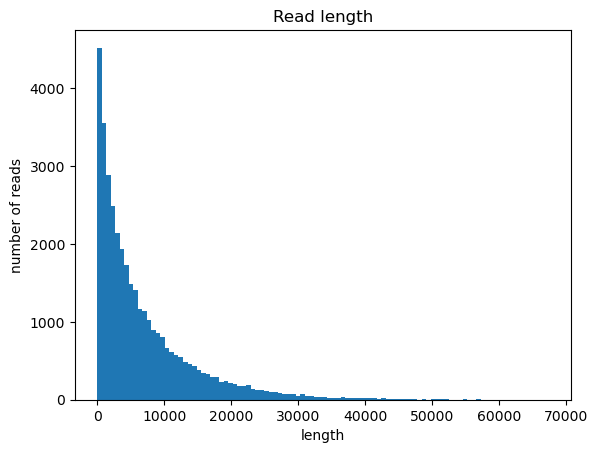

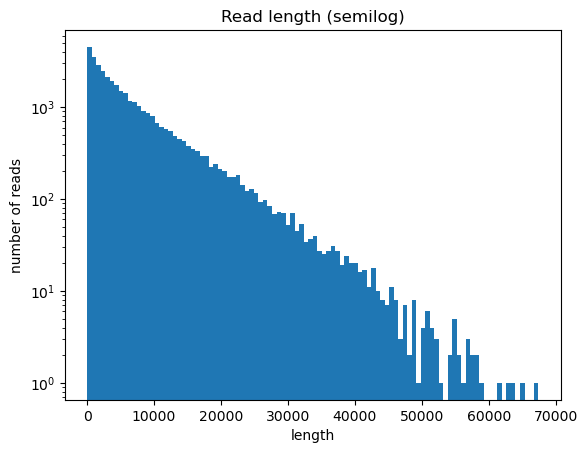

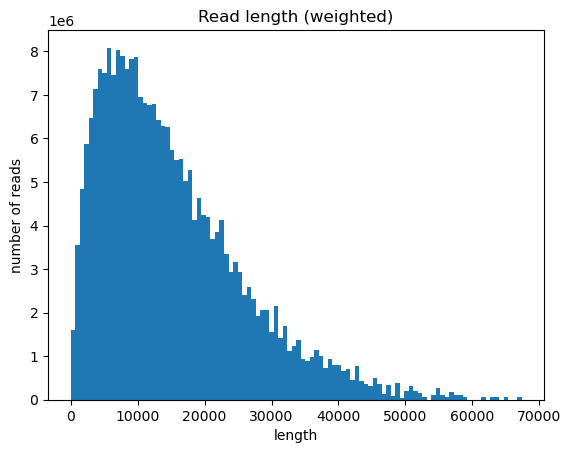

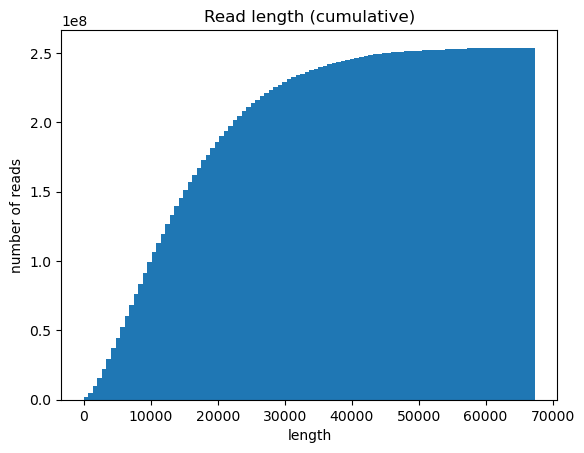

In [3]:
lengths = list()
with pysam.AlignmentFile(sam_file) as af:
    for read in af:
        if read.is_secondary or read.is_supplementary:
            continue
        lengths.append(read.query_length)

plt.hist(lengths, bins=100)
plt.title('Read length')
plt.xlabel('length')
plt.ylabel('number of reads')
plt.savefig("../results/2022-09-21_amoxicillin_run_vial_14_time_14/figures/read_lengths_positions_length.png")
plt.show()

# semilog
plt.hist(lengths, bins=100)
plt.title('Read length (semilog)')
plt.xlabel('length')
plt.ylabel('number of reads')
plt.yscale('log')
plt.savefig("../results/2022-09-21_amoxicillin_run_vial_14_time_14/figures/read_lengths_positions_length_semilog.png")
plt.show()

# weighted
plt.hist(lengths, weights=lengths, bins=100)
plt.title('Read length (weighted)')
plt.xlabel('length')
plt.ylabel('number of reads')
plt.savefig("../results/2022-09-21_amoxicillin_run_vial_14_time_14/figures/read_lengths_positions_length_weighted.png")
plt.show()

# weighted cumulative
plt.hist(lengths, weights=lengths, bins=100, cumulative=True)
plt.title('Read length (cumulative)')
plt.xlabel('length')
plt.ylabel('number of reads')
plt.savefig("../results/2022-09-21_amoxicillin_run_vial_14_time_14/figures/read_lengths_positions_length_cumulative.png")
plt.show()

## Start position

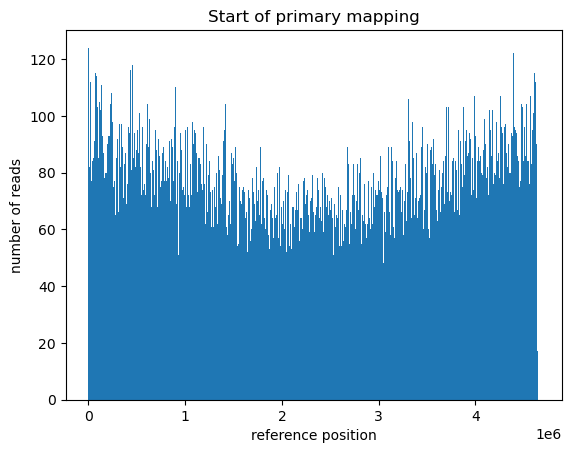

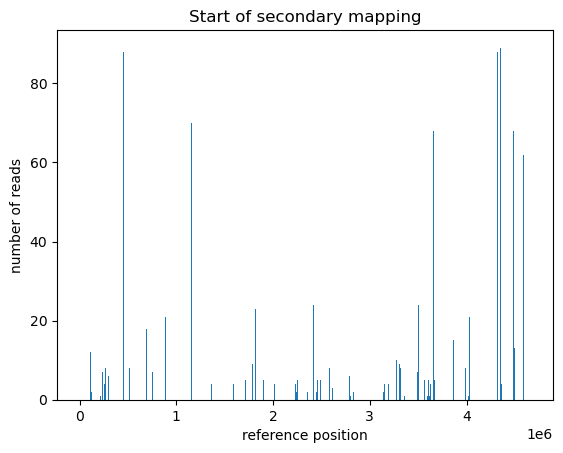

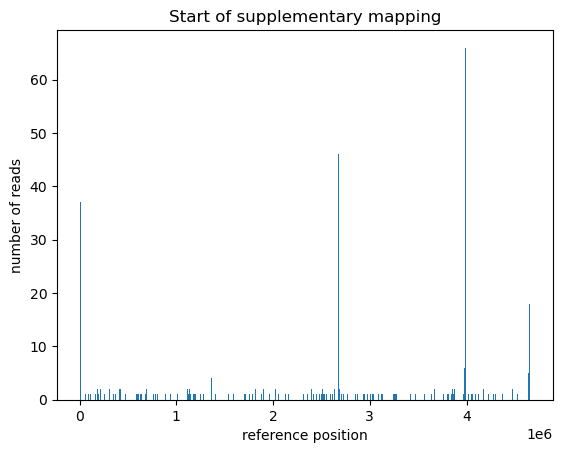

In [4]:
start_prim = list()
start_sec = list()
start_supp = list()

with pysam.AlignmentFile(sam_file) as af:
    for read in af:
        if read.is_secondary:
            start_sec.append(read.reference_start)
        elif read.is_supplementary:
            start_supp.append(read.reference_start)
        else:
            start_prim.append(read.reference_start)

step = 10000
bins = np.arange(0, 4643630 + 2*step, step)

plt.hist(start_prim,bins=bins)
plt.title('Start of primary mapping')
plt.xlabel('reference position')
plt.ylabel('number of reads')
plt.savefig("../results/2022-09-21_amoxicillin_run_vial_14_time_14/figures/read_lengths_positions_start_prim.png")
plt.show()

plt.hist(start_sec,bins=bins)
plt.title('Start of secondary mapping')
plt.xlabel('reference position')
plt.ylabel('number of reads')
plt.savefig("../results/2022-09-21_amoxicillin_run_vial_14_time_14/figures/read_lengths_positions_start_sec.png")
plt.show()

plt.hist(start_supp,bins=bins)
plt.title('Start of supplementary mapping')
plt.xlabel('reference position')
plt.ylabel('number of reads')
plt.savefig("../results/2022-09-21_amoxicillin_run_vial_14_time_14/figures/read_lengths_positions_start_suppl.png")
plt.show()

U shape for primary mapping due to mid-replication reads, high number at origin as reads lie on circular chromosome;

secondary mappings: 7 bins (10 kbp) with >60 reads which is approximately the total number of reads/kbp;

supplementary mappings: 2 with many (40+) reads + start and end higher, all others ~< 5/kbp -> few positions account for most readings as with secondary mappings

In [5]:
print('number of starts/kbp',len(start_prim)/4643.630)

number of starts/kbp 7.88004212221904


-> approx 80* coverage